len(lat_lng_values) 453
lat_lng_values [[(37.537137, 126.649466), (37.53707, 126.649523), (37.537027, 126.649533), (37.53699, 126.649555), (37.536967, 126.649577), (37.536953, 126.6496), (37.536858, 126.649775), (37.536795, 126.64989), (37.536752, 126.64997), (37.536803, 126.649935), (37.536819, 126.649929), (37.53784, 126.648342), (37.53784, 126.648342)], [(37.5336, 126.653452), (37.535062, 126.653194), (37.535062, 126.653194)], [(37.53191, 126.647907), (37.531877, 126.646888), (37.531881, 126.646855), (37.531881, 126.646855)], [(37.533812, 126.644244), (37.533506, 126.644731), (37.535392, 126.644676), (37.535393, 126.644676), (37.535393, 126.644676)], [(37.535059, 126.644607), (37.534735, 126.644619), (37.533306, 126.644916), (37.533306, 126.644916)], [(37.527572, 126.618577), (37.528205, 126.612091), (37.528306, 126.612184), (37.528907, 126.612937), (37.529102, 126.613319), (37.529596, 126.614185), (37.529859, 126.614488), (37.530687, 126.615026), (37.530925, 126.615084), (37.531892

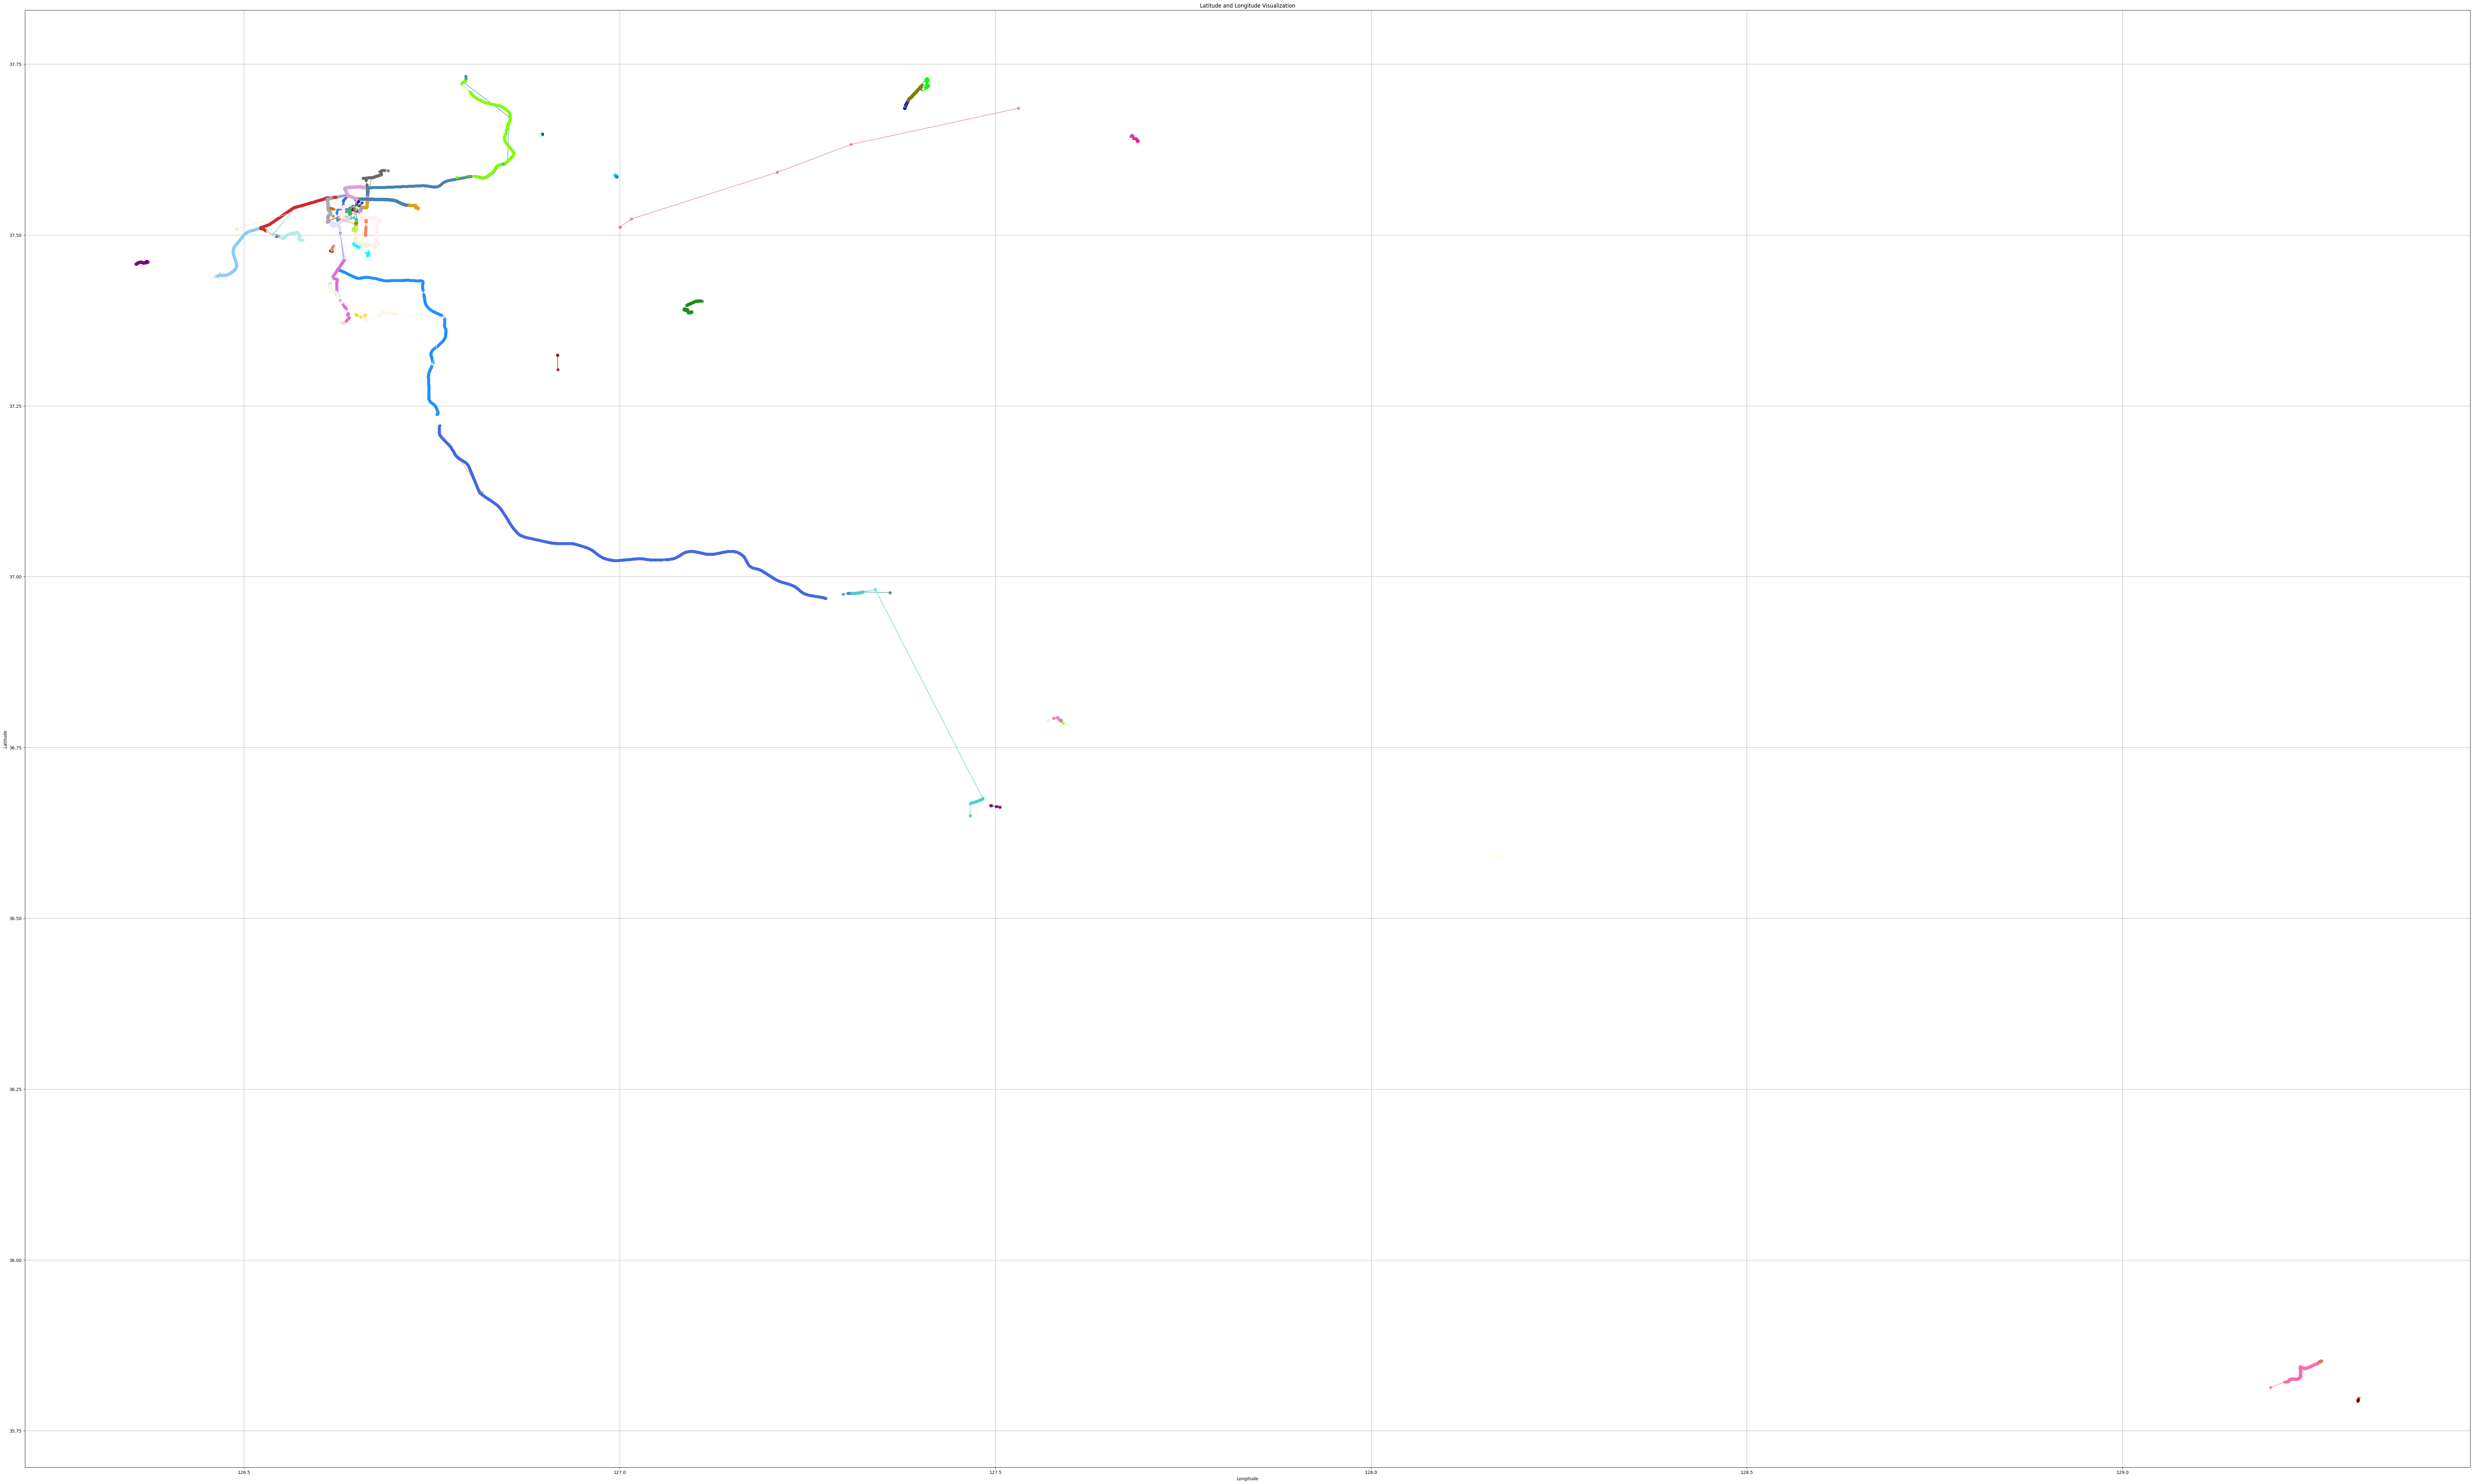

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

filenames = []
# CSV 파일에서 경로 데이터를 추출하는 함수
def extract_lat_lng_from_csv(directory):
    all_lat_lng_lists = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filenames.append(filename)
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            lat_lng_list = [(row['lat'], row['lng']) for index, row in df.iterrows()]
            all_lat_lng_lists.append(lat_lng_list)
    return all_lat_lng_lists

# 경로 데이터를 읽어오는 경로 설정
directory_path = "../어디쉐어/tracking 백업용/user1"
lat_lng_values = extract_lat_lng_from_csv(directory_path)

num_paths = len(lat_lng_values)

# tab20 컬러맵 사용하여 색상 생성
colors = list(mcolors.TABLEAU_COLORS) + list(mcolors.CSS4_COLORS)
np.random.shuffle(colors)  # 색상 리스트를 랜덤하게 섞어 인접한 색상이 유사하지 않게 함

plt.figure(figsize=(100, 60))

print('len(lat_lng_values)',len(lat_lng_values))
print('lat_lng_values',lat_lng_values)
# 각 파일의 좌표 데이터를 다른 색상으로 시각화
for i, lat_lng_list in enumerate(lat_lng_values):
    lats, lngs = zip(*lat_lng_list)
    color = colors[i % len(colors)]  # 색상 리스트에서 순차적으로 색상 선택
    fn = filenames[i]
    plt.plot(lngs, lats, marker='o', color=color, label=f'Path {i+1},{fn} ', alpha=0.7)

plt.title("Latitude and Longitude Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
# plt.legend(fontsize='x-small', loc='lower right')
plt.show()




20230415014344.csv


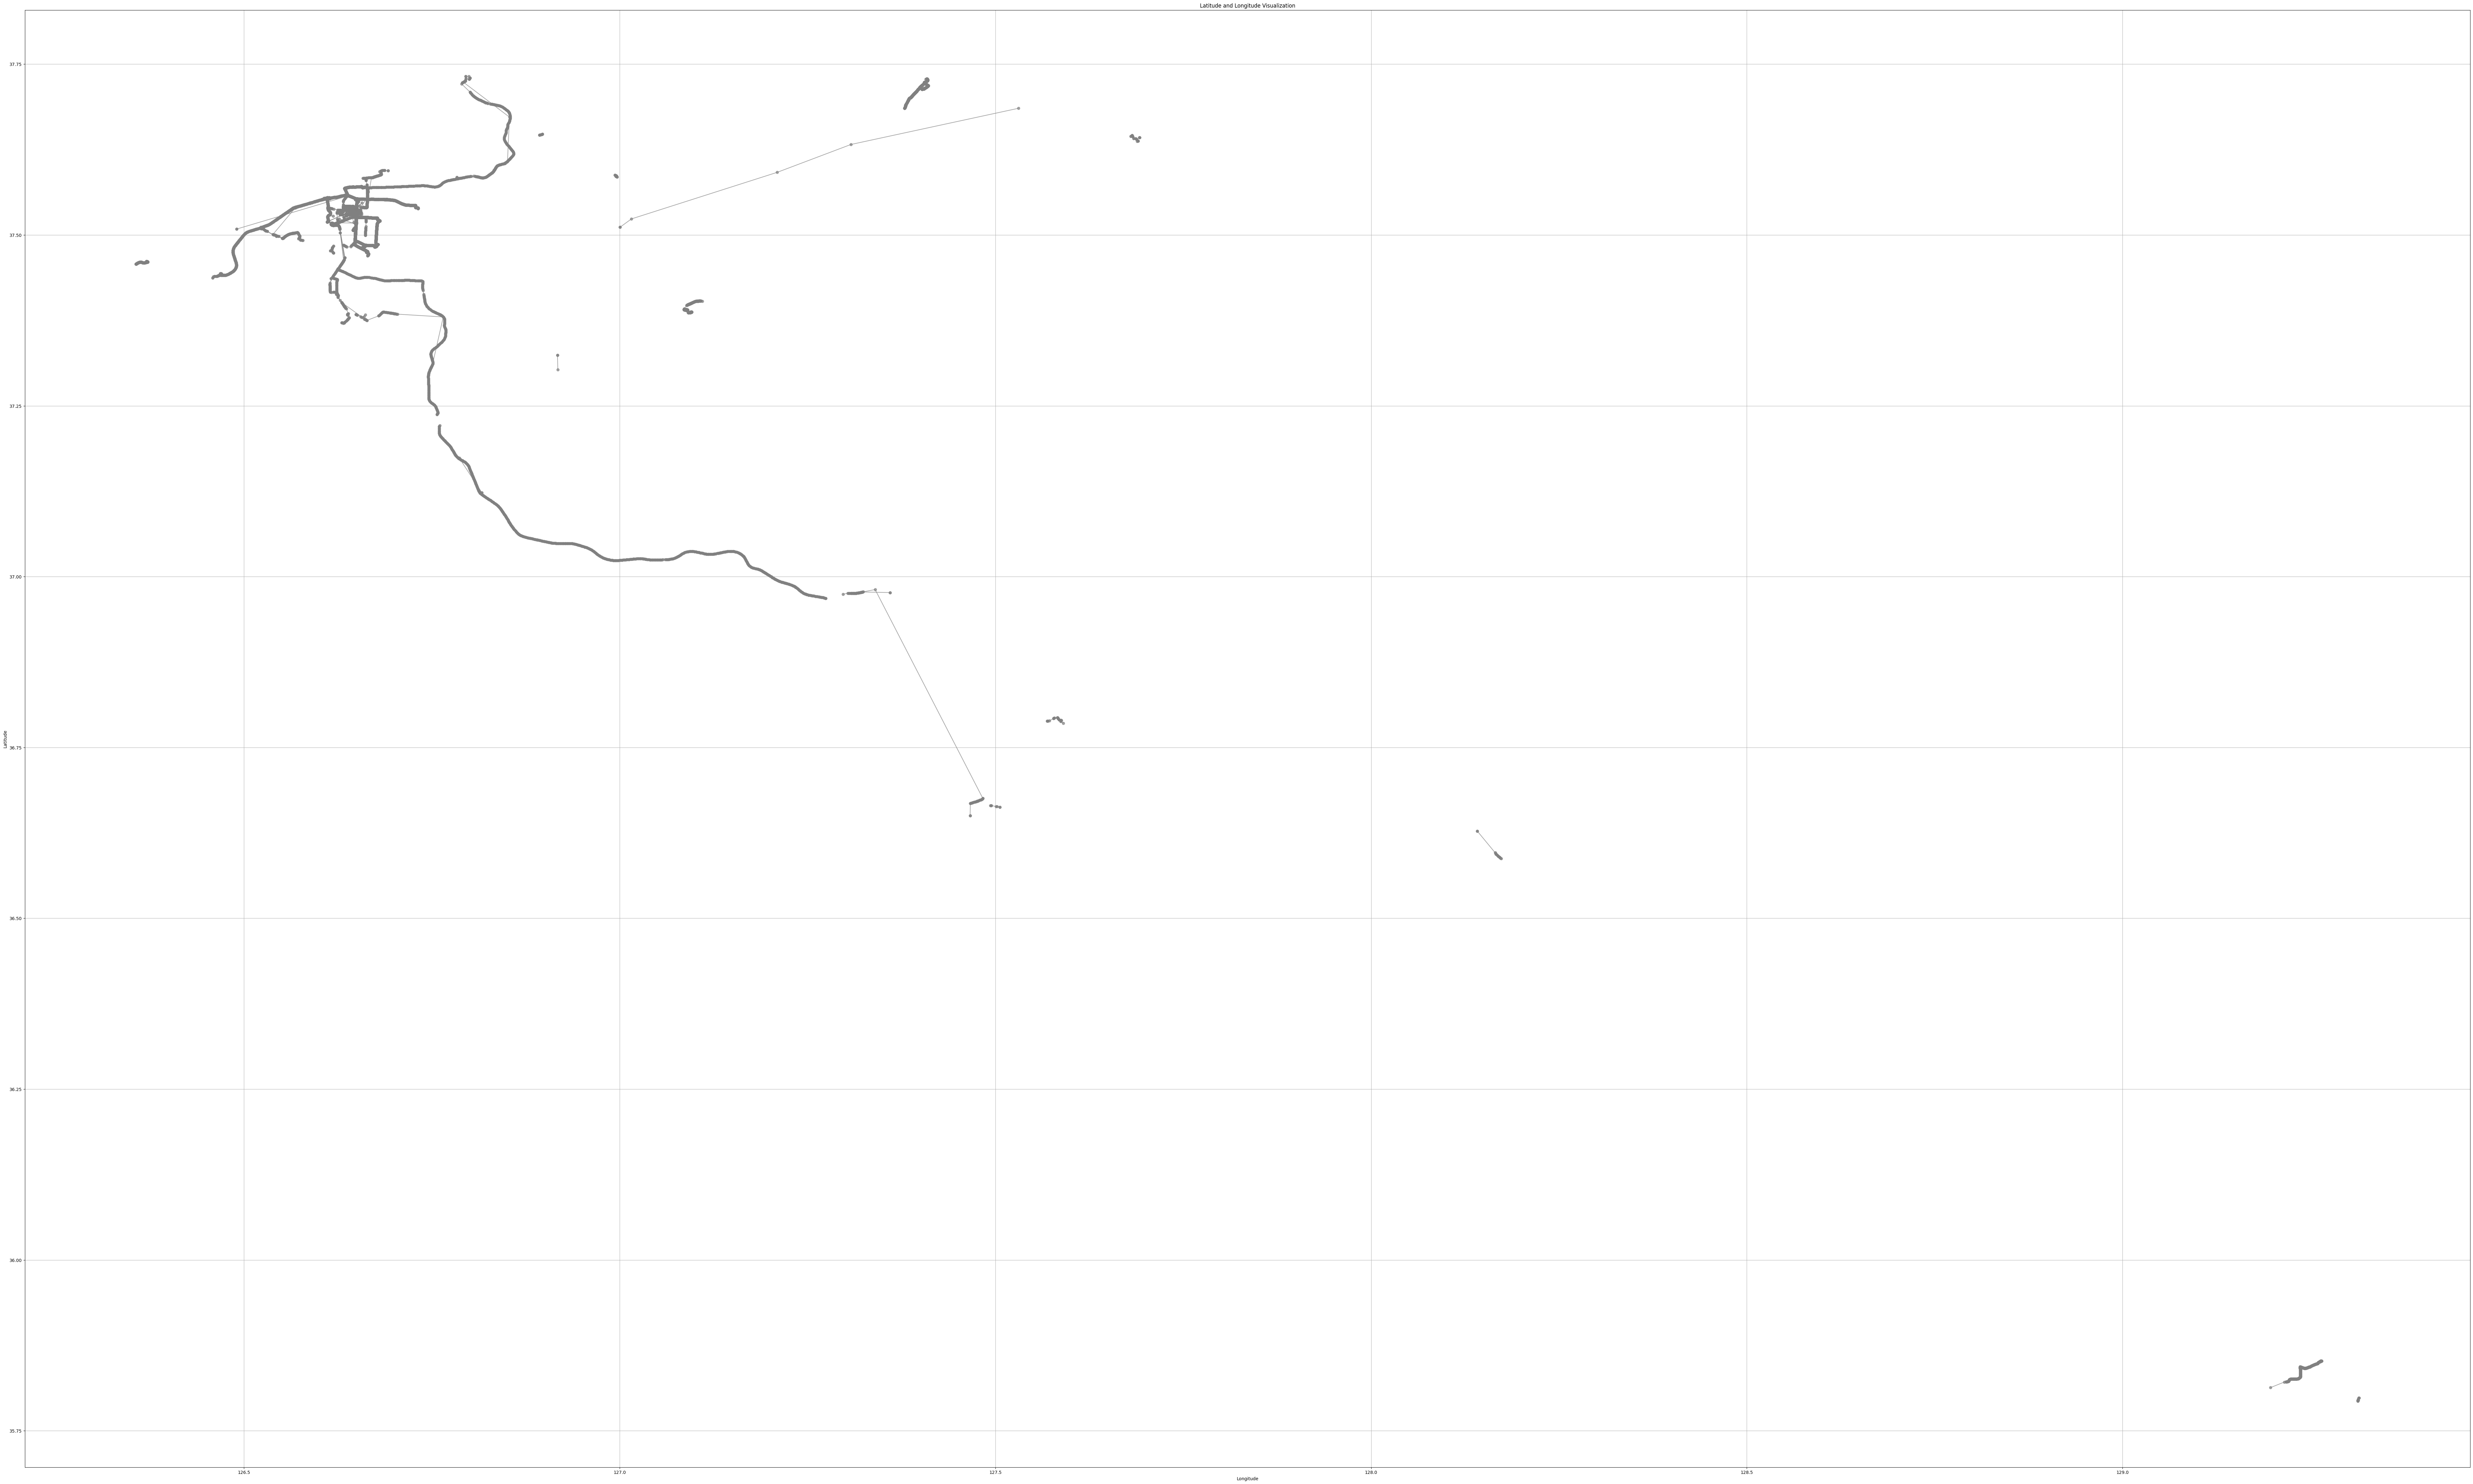

In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

filenames = []
# CSV 파일에서 경로 데이터를 추출하는 함수
def extract_lat_lng_from_csv(directory):
    all_lat_lng_lists = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filenames.append(filename)
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            lat_lng_list = [(row['lat'], row['lng']) for index, row in df.iterrows()]
            all_lat_lng_lists.append(lat_lng_list)
    return all_lat_lng_lists

# 경로 데이터를 읽어오는 경로 설정
directory_path = "../어디쉐어/tracking 백업용/user1"
lat_lng_values = extract_lat_lng_from_csv(directory_path)


path_index = 0
plt.figure(figsize=(100, 60))
for i, lat_lng_list in enumerate(lat_lng_values):
    lats, lngs = zip(*lat_lng_list)
    if i == path_index:
        color = 'red'
        alpha = 1
        print(filenames[i])
    else:
        color = 'gray'
        alpha = 0.7
    plt.plot(lngs, lats, marker='o', color=color , alpha=alpha)

plt.title("Latitude and Longitude Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
